# Seasonal Sales of Chocolates

**Loading csv files**

In [1]:
CHOC <- read.csv("data/DATA_4.04_CHOC.csv")
head(CHOC)

,time,sales,year,month
,<int>,<dbl>,<int>,<fct>
1,1,135.48187,2000,01_January
2,2,281.75873,2000,02_February
3,3,170.80064,2000,03_March
4,4,171.09512,2000,04_April
5,5,179.02492,2000,05_May
6,6,55.16525,2000,06_June


**Exploring the "CHOC" Data**

In [2]:
str(CHOC)

'data.frame':	120 obs. of  4 variables:
 $ time : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sales: num  135 282 171 171 179 ...
 $ year : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ month: Factor w/ 12 levels "01_January","02_February",..: 1 2 3 4 5 6 7 8 9 10 ...


In [3]:
summary(CHOC)

      time            sales              year              month   
 Min.   :  1.00   Min.   :  36.85   Min.   :2000   01_January :10  
 1st Qu.: 30.75   1st Qu.:  82.88   1st Qu.:2002   02_February:10  
 Median : 60.50   Median : 163.04   Median :2004   03_March   :10  
 Mean   : 60.50   Mean   : 216.70   Mean   :2004   04_April   :10  
 3rd Qu.: 90.25   3rd Qu.: 221.33   3rd Qu.:2007   05_May     :10  
 Max.   :120.00   Max.   :1068.62   Max.   :2009   06_June    :10  
                                                   (Other)    :60  

There is about 10 years of monthly sales data. On average, 216 units were sold monthly.

### Data Visualization

In [4]:
library(ggplot2)

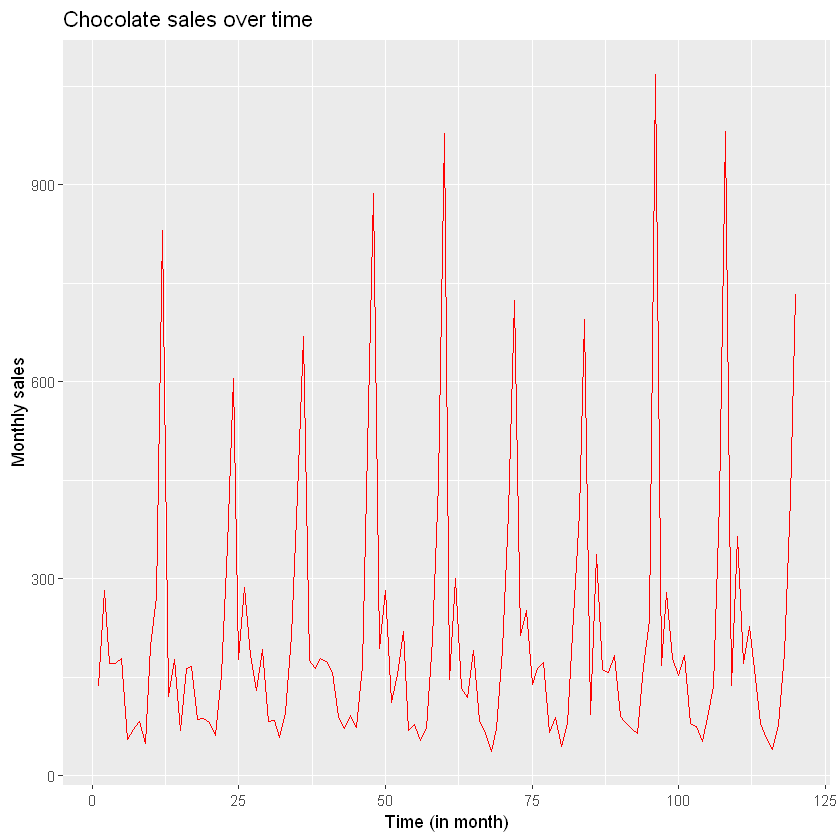

In [5]:
ggplot(data=CHOC, aes(x=time,y=sales)) + 
  geom_line(color='red') +
  xlab("Time (in month)") +
  ylab("Monthly sales") +
  ggtitle("Chocolate sales over time")

We see that the data shows seasonality.

In order to better understand what drives the sales, then let's start by creating a linear regression model of the sales (dependent variable) as a function of the month of the year (independant variable):

In [6]:
# Build a linear regression model
regres <- lm(sales ~ month,data = CHOC)
summary(regres)


Call:
lm(formula = sales ~ month, data = CHOC)

Residuals:
    Min      1Q  Median      3Q     Max 
-212.46  -17.49    2.26   19.87  251.38 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        156.211     18.306   8.533 9.78e-14 ***
month02_February   116.377     25.889   4.495 1.75e-05 ***
month03_March       -6.559     25.889  -0.253 0.800479    
month04_April        4.846     25.889   0.187 0.851854    
month05_May         24.245     25.889   0.937 0.351100    
month06_June       -78.034     25.889  -3.014 0.003212 ** 
month07_July       -80.262     25.889  -3.100 0.002466 ** 
month08_August     -94.941     25.889  -3.667 0.000382 ***
month09_September  -81.921     25.889  -3.164 0.002020 ** 
month10_October     30.185     25.889   1.166 0.246208    
month11_November   230.894     25.889   8.919 1.33e-14 ***
month12_December   661.034     25.889  25.533  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

Looking at the p-values, we can tell that most of the months are statistically significant (except for March, April, May and October). Also, looking at the t-values, we can tell that november and december have the strongest positive effect on the sales.

### Boxplots of monthly sales

Let's see the sale distribution for each month:

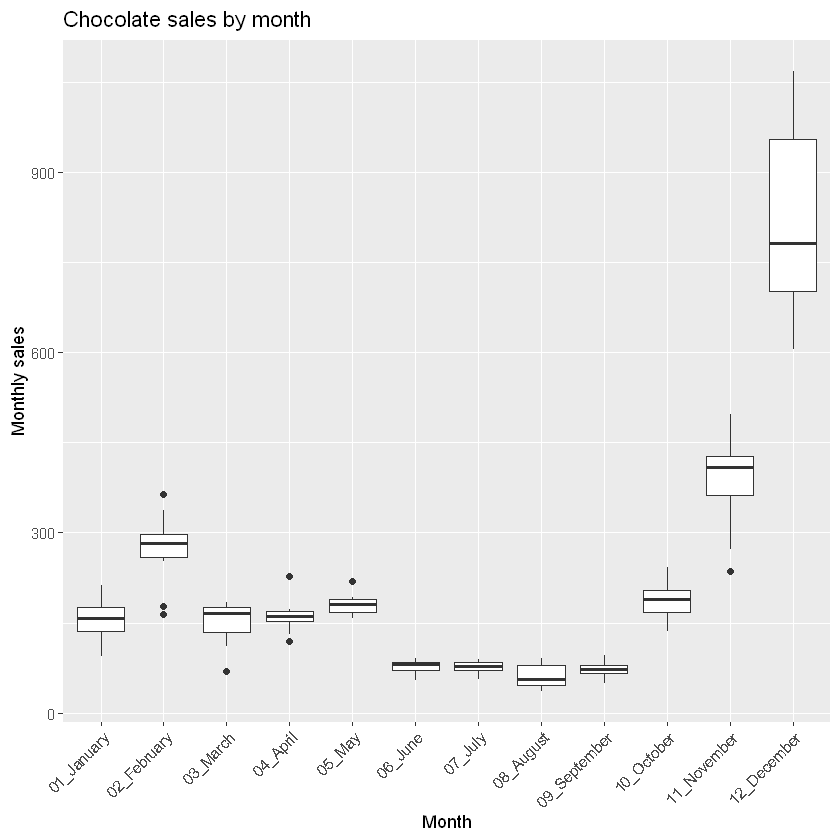

In [7]:
ggplot(data = CHOC, aes(x=month,y=sales)) + 
  geom_boxplot() +
  xlab("Month") +
  ylab("Monthly sales") +
  ggtitle("Chocolate sales by month") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

We observe that, from year to year, the there is much more variation in sales in december than in july.

### Testing the model on past data

How does the model perform on past data?

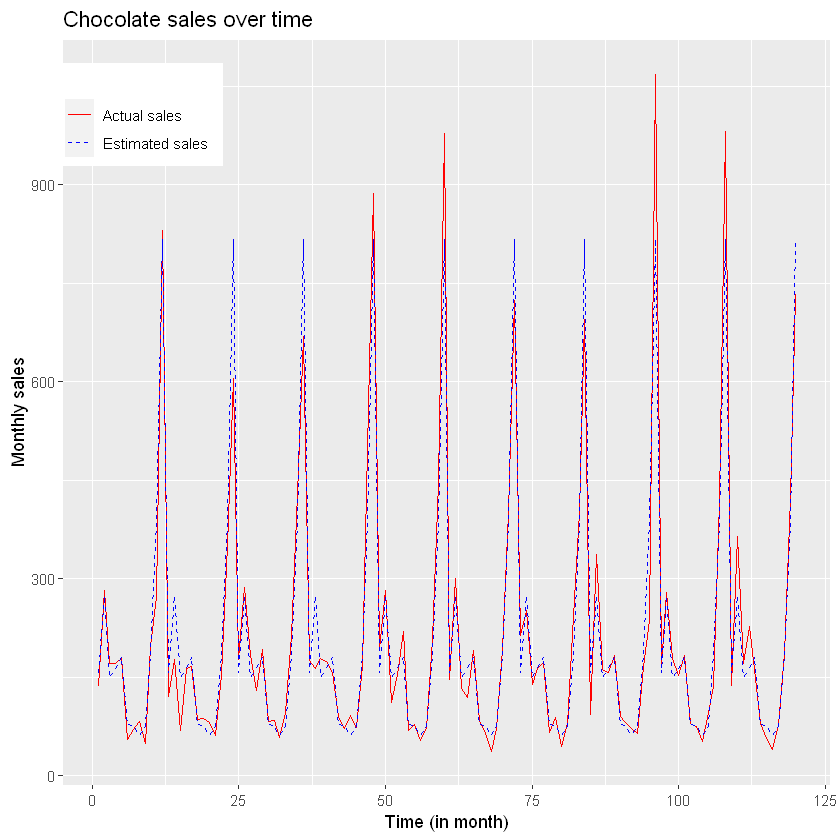

In [9]:
ggplot(data=CHOC) + 
  geom_line(aes(x=time,y=sales, color='Actual sales')) +
  xlab("Time (in month)") +
  ylab("Monthly sales") +
  ggtitle("Chocolate sales over time") +
  geom_line(aes(x=time,y=regres$fitted.values, color='Estimated sales'), linetype=2) +
  theme(legend.position=c(0.10,0.90)) + 
  scale_colour_manual("", values = c("Actual sales"="red", "Estimated sales"="blue")) +
  guides(colour = guide_legend(override.aes = list(linetype=c(1,2))))